# Load Data

In [1]:
# Connect to gdrive and copy the model over
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
!rm -r singles.zip singles/

!cp "/gdrive/MyDrive/traina/hdr/singles_more_pits.zip" singles.zip

import zipfile
import io
zf = zipfile.ZipFile('/content/singles.zip', "r")
zf.extractall('singles')

rm: cannot remove 'singles.zip': No such file or directory
rm: cannot remove 'singles/': No such file or directory


### create singles dataset

In [3]:
# !pip install split-folders

In [4]:
# import splitfolders
# splitfolders.ratio('/content/singles/content/hdr/singles', output="data", seed=1337, ratio=(.8, 0.2))

In [5]:
# from torchvision.datasets import VisionDataset

# from PIL import Image
# import numpy as np

# import os
# import os.path


# def has_file_allowed_extension(filename, extensions):
#     """Checks if a file is an allowed extension.

#     Args:
#         filename (string): path to a file
#         extensions (tuple of strings): extensions to consider (lowercase)

#     Returns:
#         bool: True if the filename ends with one of given extensions
#     """
#     return filename.lower().endswith(extensions)


# def is_image_file(filename):
#     """Checks if a file is an allowed image extension.

#     Args:
#         filename (string): path to a file

#     Returns:
#         bool: True if the filename ends with a known image extension
#     """
#     return has_file_allowed_extension(filename, IMG_EXTENSIONS)


# def make_dataset(directory, class_to_idx, extensions=None, is_valid_file=None):
#     instances = []
#     directory = os.path.expanduser(directory)
#     both_none = extensions is None and is_valid_file is None
#     both_something = extensions is not None and is_valid_file is not None
#     if both_none or both_something:
#         raise ValueError("Both extensions and is_valid_file cannot be None or not None at the same time")
#     if extensions is not None:
#         def is_valid_file(x):
#             return has_file_allowed_extension(x, extensions)
#     for target_class in sorted(class_to_idx.keys()):
#         class_index = class_to_idx[target_class]
#         target_dir = os.path.join(directory, target_class)
#         if not os.path.isdir(target_dir):
#             continue
#         for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
#             for fname in sorted(fnames):
#                 path = os.path.join(root, fname)
#                 if is_valid_file(path):
#                     item = path, class_index
#                     instances.append(item)
#     return instances


# class DatasetFolderARGB(VisionDataset):
#     """A generic data loader where the samples are arranged in this way: ::

#         root/class_x/xxx.ext
#         root/class_x/xxy.ext
#         root/class_x/xxz.ext

#         root/class_y/123.ext
#         root/class_y/nsdf3.ext
#         root/class_y/asd932_.ext

#     Args:
#         root (string): Root directory path.
#         loader (callable): A function to load a sample given its path.
#         extensions (tuple[string]): A list of allowed extensions.
#             both extensions and is_valid_file should not be passed.
#         transform (callable, optional): A function/transform that takes in
#             a sample and returns a transformed version.
#             E.g, ``transforms.RandomCrop`` for images.
#         target_transform (callable, optional): A function/transform that takes
#             in the target and transforms it.
#         is_valid_file (callable, optional): A function that takes path of a file
#             and check if the file is a valid file (used to check of corrupt files)
#             both extensions and is_valid_file should not be passed.

#      Attributes:
#         classes (list): List of the class names sorted alphabetically.
#         class_to_idx (dict): Dict with items (class_name, class_index).
#         samples (list): List of (sample path, class_index) tuples
#         targets (list): The class_index value for each image in the dataset
#     """

#     def __init__(self, root, loader, extensions=None, transform=None,
#                  target_transform=None, is_valid_file=None):
#         super(DatasetFolderARGB, self).__init__(root, transform=transform,
#                                             target_transform=target_transform)
#         classes, class_to_idx = self._find_classes(self.root)
#         samples = make_dataset(self.root, class_to_idx, extensions, is_valid_file)
#         if len(samples) == 0:
#             msg = "Found 0 files in subfolders of: {}\n".format(self.root)
#             if extensions is not None:
#                 msg += "Supported extensions are: {}".format(",".join(extensions))
#             raise RuntimeError(msg)

#         self.loader = loader
#         self.extensions = extensions

#         self.classes = classes
#         self.class_to_idx = class_to_idx
#         self.samples = samples
#         self.targets = [s[1] for s in samples]

#     def _find_classes(self, dir):
#         """
#         Finds the class folders in a dataset.

#         Args:
#             dir (string): Root directory path.

#         Returns:
#             tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.

#         Ensures:
#             No class is a subdirectory of another.
#         """
#         classes = [d.name for d in os.scandir(dir) if d.is_dir()]
#         classes.sort()
#         class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
#         return classes, class_to_idx

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (sample, target) where target is class_index of the target class.
#         """
#         path, target = self.samples[index]
#         print(path, target)
#         sample = self.loader(path)
#         # if self.transform is not None:
#         #     sample = self.transform(sample)
#         # if self.target_transform is not None:
#         #     target = self.target_transform(target)


#         # convert from 4 channel argb PIL image to tensor
#         print(type(sample))
#         np_sample = np.array(sample)
#         tensor_sample = torch.from_numpy(np_sample)

#         return tensor_sample, target

#     def __len__(self):
#         return len(self.samples)


# IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')


# def pil_loader(path):
#     # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
#     with open(path, 'rb') as f:
#         img = Image.open(f)
#         # do not convert from argb to grb - all the layers are actaully images
#         return img # .convert('RGB')


# def accimage_loader(path):
#     import accimage
#     try:
#         return accimage.Image(path)
#     except IOError:
#         # Potentially a decoding problem, fall back to PIL.Image
#         return pil_loader(path)


# def default_loader(path):
#     from torchvision import get_image_backend
#     if get_image_backend() == 'accimage':
#         print('acd_loader')
#         return accimage_loader(path)
#     else:
#         return pil_loader(path)


# class ImageFolderARGB(DatasetFolderARGB):
#     """A generic data loader where the images are arranged in this way: ::

#         root/dog/xxx.png
#         root/dog/xxy.png
#         root/dog/xxz.png

#         root/cat/123.png
#         root/cat/nsdf3.png
#         root/cat/asd932_.png

#     Args:
#         root (string): Root directory path.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         loader (callable, optional): A function to load an image given its path.
#         is_valid_file (callable, optional): A function that takes path of an Image file
#             and check if the file is a valid file (used to check of corrupt files)

#      Attributes:
#         classes (list): List of the class names sorted alphabetically.
#         class_to_idx (dict): Dict with items (class_name, class_index).
#         imgs (list): List of (image path, class_index) tuples
#     """

#     def __init__(self, root, transform=None, target_transform=None,
#                  loader=default_loader, is_valid_file=None):
#         super(ImageFolderARGB, self).__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
#                                           transform=transform,
#                                           target_transform=target_transform,
#                                           is_valid_file=is_valid_file)
#         self.imgs = self.samples

In [6]:
# Data augmentation and normalization for training
# Just normalization for validation

from torchvision import datasets, models
import torchvision.transforms.v2 as tf
import torch

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

data_transforms = {
    'train': tf.Compose([
        #transforms.CenterCrop(128),
        #transforms.RandomAffine(degrees=(0, 20), translate=(0, 0), scale=(0.85, 1.15)),
        # tf.RandomRotated(   180   ),
        tf.RandomHorizontalFlip(),
        tf.RandomVerticalFlip(),
        #tf.ScaleJitter((0.75,1.25)),
        # transforms.RandomPosterize(bits = 2),
        # transforms.RandomAdjustSharpness(sharpness_factor=2),
        # transforms.RandomAutocontrast(),
        # transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
        tf.RandomRotation(degrees=(0, 180)),
        tf.ToTensor(),
        #tf.Normalize([0.5, 0.5, 0.5], [0.25, .25, 0.25])
    ]),
    'val': tf.Compose([
        #transforms.CenterCrop(128),
        tf.ToTensor(),
        #tf.Normalize([0.5, 0.5, 0.5], [0.25, .25, 0.25])
    ]),
}

data_dir = '/content/singles/content/hdr/singles'
image_dataset = { x : datasets.ImageFolder(data_dir, data_transforms[x])
                  for x in ['train', 'val']}

validation_split = .2
shuffle_dataset = True
random_seed= 42
batch_size = 300

# Creating data indices for training and validation splits:
dataset_size = len(image_dataset['train'])
print(dataset_size)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

indices = {
    'train' : train_indices,
    'val' : val_indices,
}
print(len(indices['train']), len(indices['val']))

# # Creating PT data samplers and loaders:
# train_sampler = SubsetRandomSampler(train_indices)
# valid_sampler = SubsetRandomSampler(val_indices)

samplers = {x: SubsetRandomSampler(indices[x]) for x in ['train', 'val']}

# dataloaders = {
#   'train' : torch.utils.data.DataLoader(image_dataset, batch_size=batch_size,
#                                         sampler=train_sampler,
#                                         num_workers=2 ),
#   'val' : torch.utils.data.DataLoader(image_dataset,
#                                       batch_size=batch_size,
#                                       sampler=valid_sampler,
#                                       num_workers=2 ),
# }


dataloaders = {x: torch.utils.data.DataLoader(image_dataset[x], batch_size=batch_size,
                                             sampler=samplers[x], num_workers=2)
              for x in ['train', 'val']}

dataset_sizes = {x: len(dataloaders[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_dataset['train'].classes
print(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


33601
26881 6720
{'train': 90, 'val': 23}
['clean', 'pit']


In [7]:
print(len(image_dataset['train']))

33601


In [8]:
im = image_dataset['train'][37]

im

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

### Visualize a few images
Let's visualize a few training images so as to understand the data
augmentations.



tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

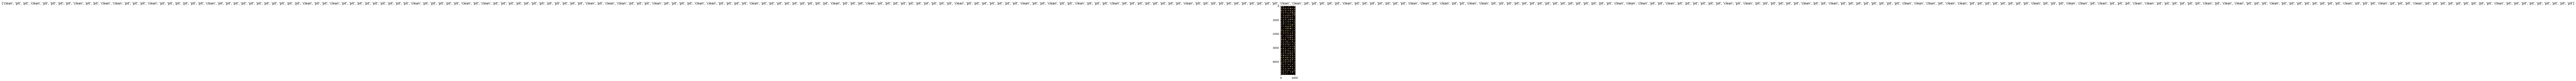

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [9]:
import os
from PIL import Image
import torchvision.transforms.functional as TF
import torchvision
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

out

## Training the model

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Visualizing the model predictions

Generic function to display predictions for a few images




In [11]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(outputs)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Finetuning the convnet

Load a pretrained model and reset final fully connected layer.




In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy

model_ft = models.resnet50(pretrained=True)
# model_ft = models.mobilenet_v3_large(num_classes = 2)


num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

#Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# params = model_ft.parameters()
optimizer_ft = optim.Adam(model_ft.parameters())

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 193MB/s]


### Train and evaluate

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.




In [13]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 67.3487 Acc: 270.5556
val Loss: 59.8371 Acc: 268.2609

Epoch 1/9
----------
train Loss: 48.3193 Acc: 278.8444
val Loss: 310.5331 Acc: 231.6087

Epoch 2/9
----------
train Loss: 46.9377 Acc: 279.3556
val Loss: 54.2654 Acc: 269.3478

Epoch 3/9
----------
train Loss: 43.7666 Acc: 280.5222
val Loss: 63.7243 Acc: 261.8696

Epoch 4/9
----------
train Loss: 41.6576 Acc: 281.6111
val Loss: 228.6922 Acc: 239.8261

Epoch 5/9
----------
train Loss: 37.1148 Acc: 284.0333
val Loss: 34.6032 Acc: 278.0435

Epoch 6/9
----------
train Loss: 33.8421 Acc: 284.9222
val Loss: 34.8541 Acc: 278.3478

Epoch 7/9
----------
train Loss: 31.8560 Acc: 285.7778
val Loss: 35.9551 Acc: 278.3478

Epoch 8/9
----------
train Loss: 31.2080 Acc: 286.1111
val Loss: 41.2663 Acc: 276.5652

Epoch 9/9
----------
train Loss: 31.2698 Acc: 286.0778
val Loss: 33.2869 Acc: 278.7826

Training complete in 15m 37s
Best val Acc: 278.782609


tensor([[-4.2010e+00,  4.4407e+00],
        [-8.9568e+00,  1.0698e+01],
        [-2.2716e+00,  2.1103e+00],
        [-4.4083e-01,  3.4769e-01],
        [-4.1156e+00,  4.1466e+00],
        [-5.0824e+00,  5.3876e+00],
        [-3.1317e+00,  2.9319e+00],
        [-1.9013e-01,  7.9769e-02],
        [ 2.3646e+00, -2.8115e+00],
        [-4.6057e+00,  4.7695e+00],
        [ 8.0704e-01, -1.0346e+00],
        [-4.2203e+00,  4.1707e+00],
        [ 1.5652e+00, -1.8883e+00],
        [-5.7532e-01,  4.9870e-01],
        [-2.8279e+00,  2.7080e+00],
        [-2.2720e+00,  2.1895e+00],
        [-3.7139e+00,  3.6849e+00],
        [ 1.4454e+00, -1.8427e+00],
        [ 1.1282e+00, -1.4168e+00],
        [ 8.0747e-01, -1.0143e+00],
        [-6.6104e+00,  7.6789e+00],
        [-5.0396e+00,  5.3807e+00],
        [-7.2147e+00,  8.5120e+00],
        [-4.3380e+00,  4.1744e+00],
        [-1.8220e+00,  1.6733e+00],
        [ 7.0192e-01, -9.2145e-01],
        [ 1.2900e+00, -1.6035e+00],
        [-5.3798e+00,  5.368

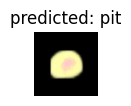

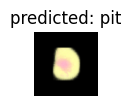

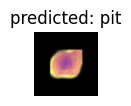

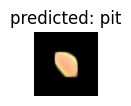

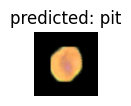

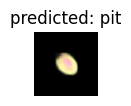

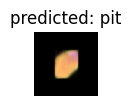

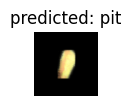

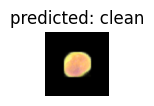

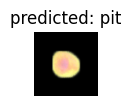

In [14]:
visualize_model(model_ft, num_images=10)

It would be nice to view the dataset with fiftyone, but that is still a work in progress right now

In [15]:
# from google.colab import drive
# drive.mount('/gdrive')

path =  'classification.pt'
torch.save(model_ft.state_dict(), path)

import time
timestr = time.strftime("%Y%m%d-%H%M%S")

filename = 'classification-{0}.pt'.format(timestr)

!cp classification.pt /content/drive/MyDrive/classification-2_25_2024.pt


cp: cannot create regular file '/content/drive/MyDrive/classification-2_25_2024.pt': No such file or directory


In [16]:
pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 15.7 MB/s eta 0:00:00
  Installing build depen

In [17]:
import fiftyone as fo
from fiftyone import ViewField as F

Migrating database to v0.23.8


INFO:fiftyone.migrations.runner:Migrating database to v0.23.8


In [18]:

samples = []

def add_to_fiddy(input, label, ouput, pred, conf, confs, img_path, dataset_type):
    global samples

    print(label, ouput, pred, conf, confs, img_path[0])
    sample = fo.Sample(filepath=img_path[0],  tags=[dataset_type])

    classes = ['cherry_clean', 'cherry_pit']

    sample["ground_truth"] = fo.Classification(label=classes[label])
    sample["prediction"] = fo.Classification(label=classes[pred], confidence=conf)

    samples.append(sample)


def evaluate_model(model, num_images=6, dataset_type='val'):

    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    m = nn.Softmax(dim=1)

    with torch.no_grad():

        dl = dataloaders[dataset_type]
        for i, (inputs, labels) in enumerate(dl):
            inputs = inputs.to(device)
            labels = labels.to(device)

            images = dl.dataset.imgs[i*300:(i+1)*300]

            #print(inputs)
            outputs = model(inputs)
            confs = m(outputs)
            index, preds = torch.max(confs, 1)



            #print(outputs)

            for j in range(inputs.size()[0]):

                add_to_fiddy(
                    inputs[j].cpu().numpy(),
                    labels[j].cpu().numpy(),
                    outputs[j].cpu().numpy(),
                    preds[j].cpu().numpy(),
                    index[j].cpu().numpy(),
                    confs[j].cpu().numpy(),
                    images[j],
                    dataset_type)

                images_so_far += 1
                # ax = plt.subplot(num_images//2, 2, images_so_far)
                # ax.axis('off')
                # ax.set_title(f'predicted: {class_names[preds[j]]}')
                # imshow(inputs.cpu().data[j])



                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


evaluate_model(model_ft, 20000, dataset_type='val')
evaluate_model(model_ft, 20000, dataset_type='train')



Streaming output truncated to the last 5000 lines.
1 [-6.8383036  6.8106976] 1 0.9999988 [1.1811734e-06 9.9999881e-01] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-005_pit.png
0 [ 1.3131658 -1.605105 ] 0 0.9487422 [0.9487422  0.05125772] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-006_pit.png
1 [-6.807257  6.955171] 1 0.9999989 [1.0545152e-06 9.9999893e-01] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-007_pit.png
0 [-1.4223573  1.2417302] 1 0.93487394 [0.06512602 0.93487394] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-008_pit.png
0 [ 0.35956436 -0.56302404] 0 0.7155692 [0.7155692 0.2844308] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-009_pit.png
0 [ 2.30302   -2.7527337] 0 0.9936678 [0.9936678  0.00633221] /content/singles/content/hdr/singles/pit/missed_pit_5_11_2024_20240511T161243392900-01

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
dataset = fo.Dataset("cherry-classification-dataset")
#dataset = fo.load_dataset("cherry-classification-dataset")
dataset.clear()
dataset.add_samples(samples)


 100% |█████████████| 26720/26720 [16.5s elapsed, 0s remaining, 1.3K samples/s]       


INFO:eta.core.utils: 100% |█████████████| 26720/26720 [16.5s elapsed, 0s remaining, 1.3K samples/s]       


['665674d2cce5ec4238df28e1',
 '665674d2cce5ec4238df28e2',
 '665674d2cce5ec4238df28e3',
 '665674d2cce5ec4238df28e4',
 '665674d2cce5ec4238df28e5',
 '665674d2cce5ec4238df28e6',
 '665674d2cce5ec4238df28e7',
 '665674d2cce5ec4238df28e8',
 '665674d2cce5ec4238df28e9',
 '665674d2cce5ec4238df28ea',
 '665674d2cce5ec4238df28eb',
 '665674d2cce5ec4238df28ec',
 '665674d2cce5ec4238df28ed',
 '665674d2cce5ec4238df28ee',
 '665674d2cce5ec4238df28ef',
 '665674d2cce5ec4238df28f0',
 '665674d2cce5ec4238df28f1',
 '665674d2cce5ec4238df28f2',
 '665674d2cce5ec4238df28f3',
 '665674d2cce5ec4238df28f4',
 '665674d2cce5ec4238df28f5',
 '665674d2cce5ec4238df28f6',
 '665674d2cce5ec4238df28f7',
 '665674d2cce5ec4238df28f8',
 '665674d2cce5ec4238df28f9',
 '665674d2cce5ec4238df28fa',
 '665674d2cce5ec4238df28fb',
 '665674d2cce5ec4238df28fc',
 '665674d2cce5ec4238df28fd',
 '665674d2cce5ec4238df28fe',
 '665674d2cce5ec4238df28ff',
 '665674d2cce5ec4238df2900',
 '665674d2cce5ec4238df2901',
 '665674d2cce5ec4238df2902',
 '665674d2cce5

In [20]:

#fo.load_dataset()
fo.close_app()
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.8

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.8

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [21]:

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_classifications(
    "prediction",

)



In [22]:

# # Get the 10 most common classes in the dataset
# counts = dataset.count_values("ground_truth.detections.label")
# classes = sorted(counts, key=counts.get, reverse=True)[:2]

# # Print a classification report for the top-10 classes
# results.print_report(classes=classes)

In [23]:
plot = results.plot_confusion_matrix(classes=['cherry_clean', 'cherry_pit'])
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1580: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [24]:
results.print_report()


              precision    recall  f1-score   support

cherry_clean       0.86      0.94      0.90      5577
  cherry_pit       0.98      0.96      0.97     21143

    accuracy                           0.96     26720
   macro avg       0.92      0.95      0.93     26720
weighted avg       0.96      0.96      0.96     26720



In [25]:
plot.freeze()

In [26]:
# Show most INCORRECT predictions on validation split
session.view = (
    dataset
    .match_tags("val")
    .match(F("predictions.label") != F("ground_truth.label"))
)

In [27]:
VAL_view = (
    dataset
    .match_tags("val")
)


# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = VAL_view.evaluate_classifications(
    "prediction",

)

plot = results.plot_confusion_matrix(classes=['cherry_clean', 'cherry_pit'])
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1580: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [28]:
results.print_report()


              precision    recall  f1-score   support

cherry_clean       0.87      0.92      0.89      1407
  cherry_pit       0.98      0.96      0.97      5313

    accuracy                           0.95      6720
   macro avg       0.92      0.94      0.93      6720
weighted avg       0.96      0.95      0.95      6720



In [29]:
if not os.path.exists('singles_iter2'):
    os.makedirs('singles_iter2')
if not os.path.exists('singles_iter2/pit'):
    os.makedirs('singles_iter2/pit')
if not os.path.exists('singles_iter2/clean'):
    os.makedirs('singles_iter2/clean')
if not os.path.exists('singles_iter2/maybe'):
    os.makedirs('singles_iter2/maybe')

In [30]:
normal_trans = data_transforms['val']

import shutil

def sort_for_maybe(img_path, img_name, type):
  pil_path = os.path.join(img_path, img_name)

  img_pil = Image.open(pil_path)
  img = normal_trans(img_pil).float()
  #print(img)
  pred = model_ft(img.cuda().unsqueeze(0))
  _, preds = torch.max(pred, 1)
  #print(preds)
  if(type == 'pit'):
    if (preds == 1):
      print('pit', 'pit')
      dest_dir = os.path.join('/content/singles_iter2', 'pit')
    else:
      print('pit', 'maybe')
      dest_dir = os.path.join('/content/singles_iter2', 'maybe')
  else:
    if (preds == 0):
      print('clean', 'clean')
      dest_dir = os.path.join('/content/singles_iter2', 'clean')
    else:
      print('clean', 'maybe')
      dest_dir = os.path.join('/content/singles_iter2', 'maybe')
  shutil.copyfile(pil_path, os.path.join(dest_dir, img_name))



img, tgt = image_dataset['train'][0]

sort_for_maybe('/content/singles/content/hdr/singles_rgb/pit/', 'natural_10426823-002_pit.png', 'pit')

FileNotFoundError: [Errno 2] No such file or directory: '/content/singles/content/hdr/singles_rgb/pit/natural_10426823-002_pit.png'

In [ ]:
pit_dir = '/content/singles/content/hdr/singles_rgb/pit'
for file in os.listdir(pit_dir):
  sort_for_maybe(pit_dir, file, 'pit')

In [ ]:
clean_dir = '/content/singles/content/hdr/singles_rgb/clean'
for file in os.listdir(clean_dir):
  sort_for_maybe(clean_dir, file, 'clean')

In [ ]:
!zip -r /content/singles_iter2.zip /content/singles_iter2

In [ ]:
!cp /content/singles_iter2.zip /gdrive/MyDrive/traina/hdr/singles_iter2.zip

In [ ]:
!ls -la